In [1]:
import pandas as pd
import numpy as np
import math
import requests
import acquire as a
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from pprint import pprint
from vega_datasets import data
%matplotlib inline

In [2]:
df = a.acquire_store()
df.head(3)

,sale_date,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
0,2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
1,2013-01-02,11,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2,2013-01-03,14,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253


## The end result of this exercise should be a file named `prepare.py`.

### Using your store items data:

### **1. Convert date column to datetime format.**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 913000 entries, 0 to 912999
Data columns (total 7 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   sale_date      913000 non-null  object 
 1   sale_amount    913000 non-null  int64  
 2   item_brand     913000 non-null  object 
 3   item_name      913000 non-null  object 
 4   item_price     913000 non-null  float64
 5   store_address  913000 non-null  object 
 6   store_zipcode  913000 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 48.8+ MB


df['sale_date'] = pd.to_datetime(df['sale_date'], infer_datetime_format=True)

#now verify that the dtype is what we expect
df.info()

In [4]:
# instructor's way 
df.sale_date = df.sale_date.astype('datetime64[ns]')

### **2. Plot the distribution of `sale_amount` and `item_price`.**

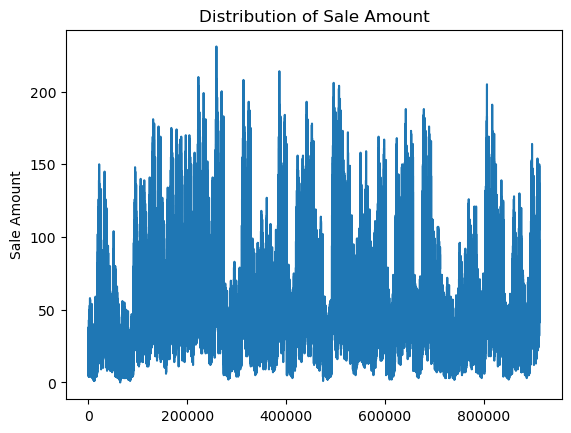

In [5]:
df.sale_amount.plot()
plt.title('Distribution of Sale Amount')
plt.ylabel('Sale Amount')
plt.show()

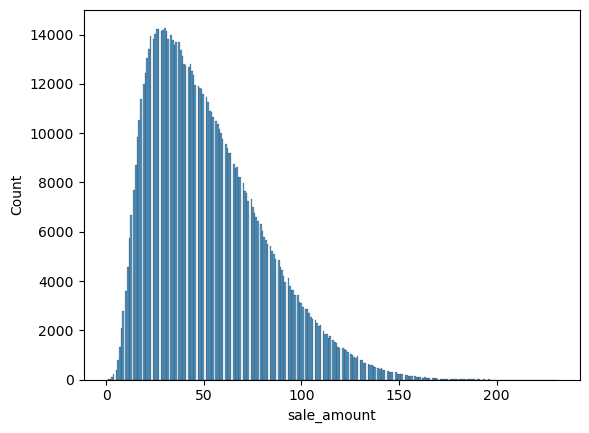

In [6]:
sns.histplot(data=df, x='sale_amount');

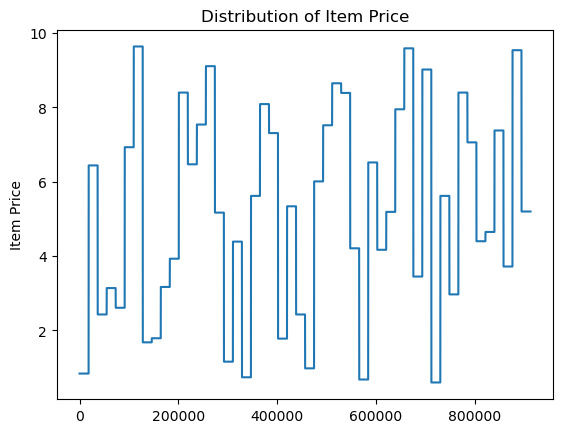

In [7]:
df.item_price.plot()
plt.title('Distribution of Item Price')
plt.ylabel('Item Price')
plt.show()

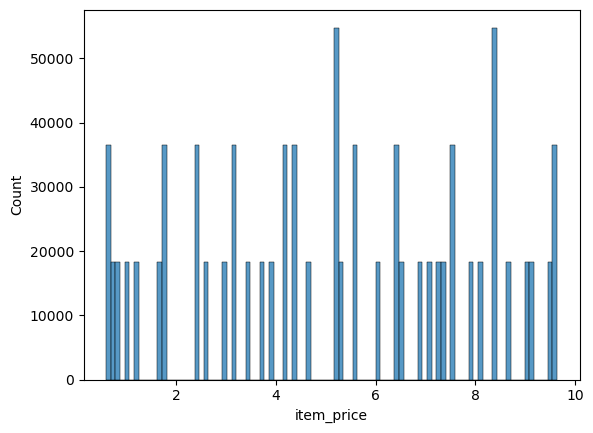

In [8]:
sns.histplot(data=df, x='item_price');

### **3. Set the index to be the datetime variable.**

In [9]:
#now that the date col is in datetime format, we can set it to our index
df = df.set_index('sale_date')
#now, we sort the index
df = df.sort_index()
df.head()

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode
sale_date,,,,,,
2013-01-01,13,Riceland,Riceland American Jazmine Rice,0.84,12125 Alamo Ranch Pkwy,78253
2013-01-01,26,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,12018 Perrin Beitel Rd,78217
2013-01-01,27,Mama Marys,Pizza Sauce,4.65,12018 Perrin Beitel Rd,78217
2013-01-01,54,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,15000 San Pedro Ave,78232
2013-01-01,35,Mueller,Mueller Sport Care Basic Support Level Medium ...,8.40,735 SW Military Dr,78221


### **4. Add a 'month' and 'day of week' column to your dataframe.**

In [10]:
df['month']= df.index.month_name()
df['day_of_week'] = df.index.day_name()
df.sample(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week
sale_date,,,,,,,,
2015-09-07,42,Natures Way,Natures Way Forskohlii - 60 Ct,5.19,1520 Austin Hwy,78218,September,Monday
2017-02-25,76,Usda Produce,Guava,7.52,12125 Alamo Ranch Pkwy,78253,February,Saturday


### **5. Add a column to your dataframe, `sales_total`, which is a derived from `sale_amount` (total items) and `item_price`.**

In [11]:
df['sales_total'] = df['sale_amount'] *df['item_price']
df.sample(2)

,sale_amount,item_brand,item_name,item_price,store_address,store_zipcode,month,day_of_week,sales_total
sale_date,,,,,,,,,
2013-07-17,94,Hood,Hood Latte Iced Coffee Drink Vanilla Latte,2.43,15000 San Pedro Ave,78232,July,Wednesday,228.42
2014-10-09,35,Careone,Careone Family Comb Set - 8 Ct,0.74,12125 Alamo Ranch Pkwy,78253,October,Thursday,25.90


### **6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**

In [12]:
def convert_to_datetime(df):
    '''
    This function takes in a dataframe
    and converts the sales_date column to a datetime
    '''
    df.sale_date = pd.to_datetime(df.sale_date, infer_datetime_format=True)
    return df

### Using the OPS data acquired in the Acquire exercises `opsd_germany_daily.csv`, complete the following:

### **1. Convert date column to datetime format.**


In [17]:
germany = a.get_germany_data()
germany.head(3)

,Date,Consumption,Wind,Solar,Wind+Solar
0,2006-01-01,1069.184,NaN,NaN,NaN
1,2006-01-02,1380.521,NaN,NaN,NaN
2,2006-01-03,1442.533,NaN,NaN,NaN


In [18]:
germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Date         4383 non-null   object 
 1   Consumption  4383 non-null   float64
 2   Wind         2920 non-null   float64
 3   Solar        2188 non-null   float64
 4   Wind+Solar   2187 non-null   float64
dtypes: float64(4), object(1)
memory usage: 205.5+ KB


In [19]:
germany.Date = germany.Date.astype('datetime64[ns]')
germany.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4383 entries, 0 to 4382
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   Date         4383 non-null   datetime64[ns]
 1   Consumption  4383 non-null   float64       
 2   Wind         2920 non-null   float64       
 3   Solar        2188 non-null   float64       
 4   Wind+Solar   2187 non-null   float64       
dtypes: datetime64[ns](1), float64(4)
memory usage: 205.5 KB


### **2. Plot the distribution of each of your variables.**

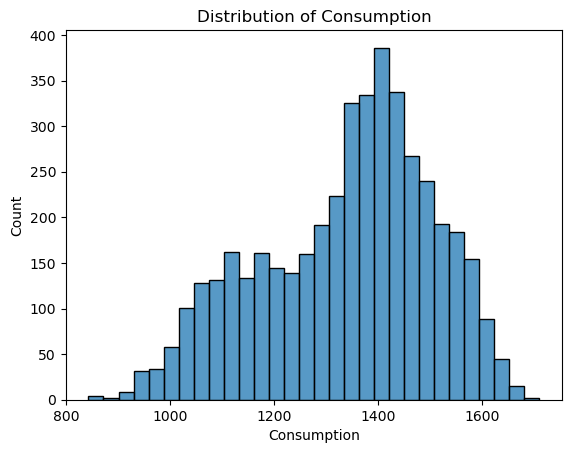

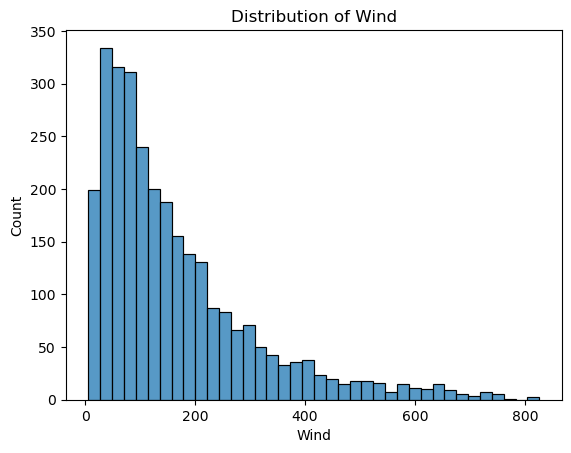

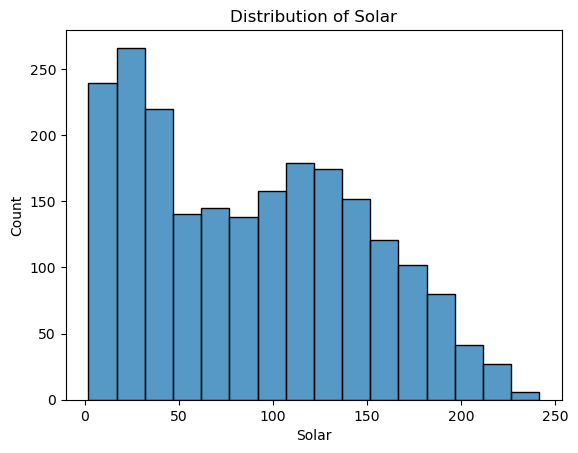

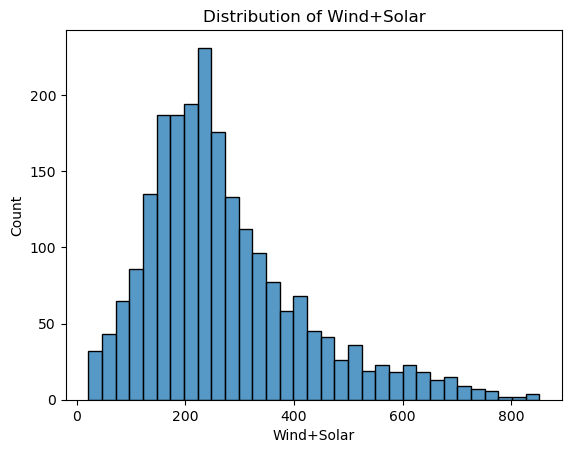

In [21]:
#visualize distribution using sns
for col in list(germany.columns.drop('Date')):
    plt.figure()
    sns.histplot(germany[col])
    plt.title('Distribution of {}'.format(col))

### **3. Set the index to be the datetime variable.**

In [23]:
germany = germany.set_index('Date').sort_index()
#recheck index
type(germany.index)

pandas.core.indexes.datetimes.DatetimeIndex

In [24]:
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar
Date,,,,
2006-01-01,1069.184,NaN,NaN,NaN
2006-01-02,1380.521,NaN,NaN,NaN
2006-01-03,1442.533,NaN,NaN,NaN


### **4. Add a month and a year column to your dataframe.**

In [25]:
#create new column for month
germany['month'] = germany.index.month_name()

#create new column for year
germany['year'] = germany.index.year
#take a look
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,NaN,NaN,NaN,January,2006
2006-01-02,1380.521,NaN,NaN,NaN,January,2006
2006-01-03,1442.533,NaN,NaN,NaN,January,2006


### **5. Fill any missing values.**

In [26]:
#check for nulls
germany.isnull().sum()

Consumption       0
Wind           1463
Solar          2195
Wind+Solar     2196
month             0
year              0
dtype: int64

In [28]:
#fill nulls with 0
germany.fillna(0, inplace = True)

#take a look
germany.head(3)

,Consumption,Wind,Solar,Wind+Solar,month,year
Date,,,,,,
2006-01-01,1069.184,0.0,0.0,0.0,January,2006
2006-01-02,1380.521,0.0,0.0,0.0,January,2006
2006-01-03,1442.533,0.0,0.0,0.0,January,2006


### **6. Make sure all the work that you have done above is reproducible. That is, you should put the code above into separate functions and be able to re-run the functions and get the same results.**

In [29]:
def plot_distributions(df):
    for col in list(df.columns.drop('Date')):
        plt.figure()
        sns.histplot(df[col])
        plt.title('Distribution of {}'.format(col))